In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#1.Importing the data

In [3]:
df_country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df_dictionary = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')
df_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


#2. Clustering using the KMeans model

In [12]:
X=df_country.iloc[:, 1:10].values
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [13]:
sc = StandardScaler()
X=sc.fit_transform(X)

Kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_Kmeans=Kmeans.fit_predict(X)
print(y_Kmeans)


[1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


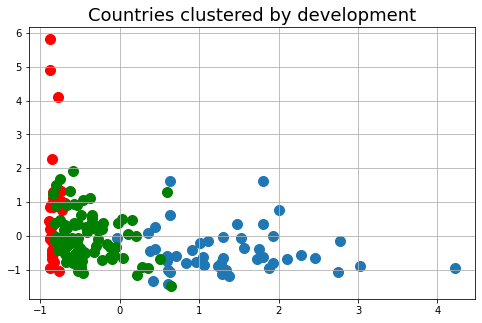

In [17]:
plt.figure(figsize=(8,5))
plt.title("Countries clustered by development", fontsize=18)
plt.grid(True)
plt.scatter(X[y_Kmeans == 0,0],X[y_Kmeans == 0,1] , s=100 , c='r' , label='Under-developing')
plt.scatter(X[y_Kmeans == 1,0],X[y_Kmeans == 1,1] , s=100 , label='Developing')
plt.scatter(X[y_Kmeans == 2,0],X[y_Kmeans == 2,1] , s=100 , c='g' , label='Developed')

In [20]:
df_country['dev_index'] = pd.Series(y_Kmeans, index=df_country.index)
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dev_index
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1
